<a href="https://colab.research.google.com/github/Akellesh/Employee_Attrition_Prediction_ML_Project_Coursera/blob/main/Employee_Attrition_Prediction_ML_Project_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Understand the problem statement and Business case

*   Hiring/retaining employees is an expensive process that requires capital, time and skills.
*   Average companies lose 1% - 2.5% of their total revenue on the time it takes to bring a new hire up to speed.
*   Companies spend 15% - 20% of the employee's salary to recruit a new candidate.
*   In this project, we will train a machine learning model to predict which employees are more likely to quit based on their features such as:
        *   Job Involvement
        *   Education
        *   Job Satisfaction
        *   Performance Rating
        *   Work life balance
        *   Relationship Satisfaction







# Task 2: Import Packages & Load Data

## 2.1. Import Packages

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [61]:
# Model Selection and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## 2.2. Load Data

In [3]:
employee_data = pd.read_csv('/content/employee_data.csv')
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_data.shape

(1470, 35)

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Staistical Summary
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Task 3: Perform Data Visualization

## 3.1. Label Encoding

In [7]:
print(employee_data['Attrition'].value_counts())
print(employee_data['OverTime'].value_counts())
print(employee_data['Over18'].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
OverTime
No     1054
Yes     416
Name: count, dtype: int64
Over18
Y    1470
Name: count, dtype: int64


In [8]:
employee_data['Attrition'] = employee_data['Attrition'].map({'Yes': 1, 'No': 0})
# employee_data['Attrition'] = employee_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_data['OverTime'] = employee_data['OverTime'].map({'Yes': 1, 'No': 0})
employee_data['Over18'] = employee_data['Over18'].map({'Y': 1, 'N': 0})
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
employee_data['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


## 3.2. Visualization Part 1

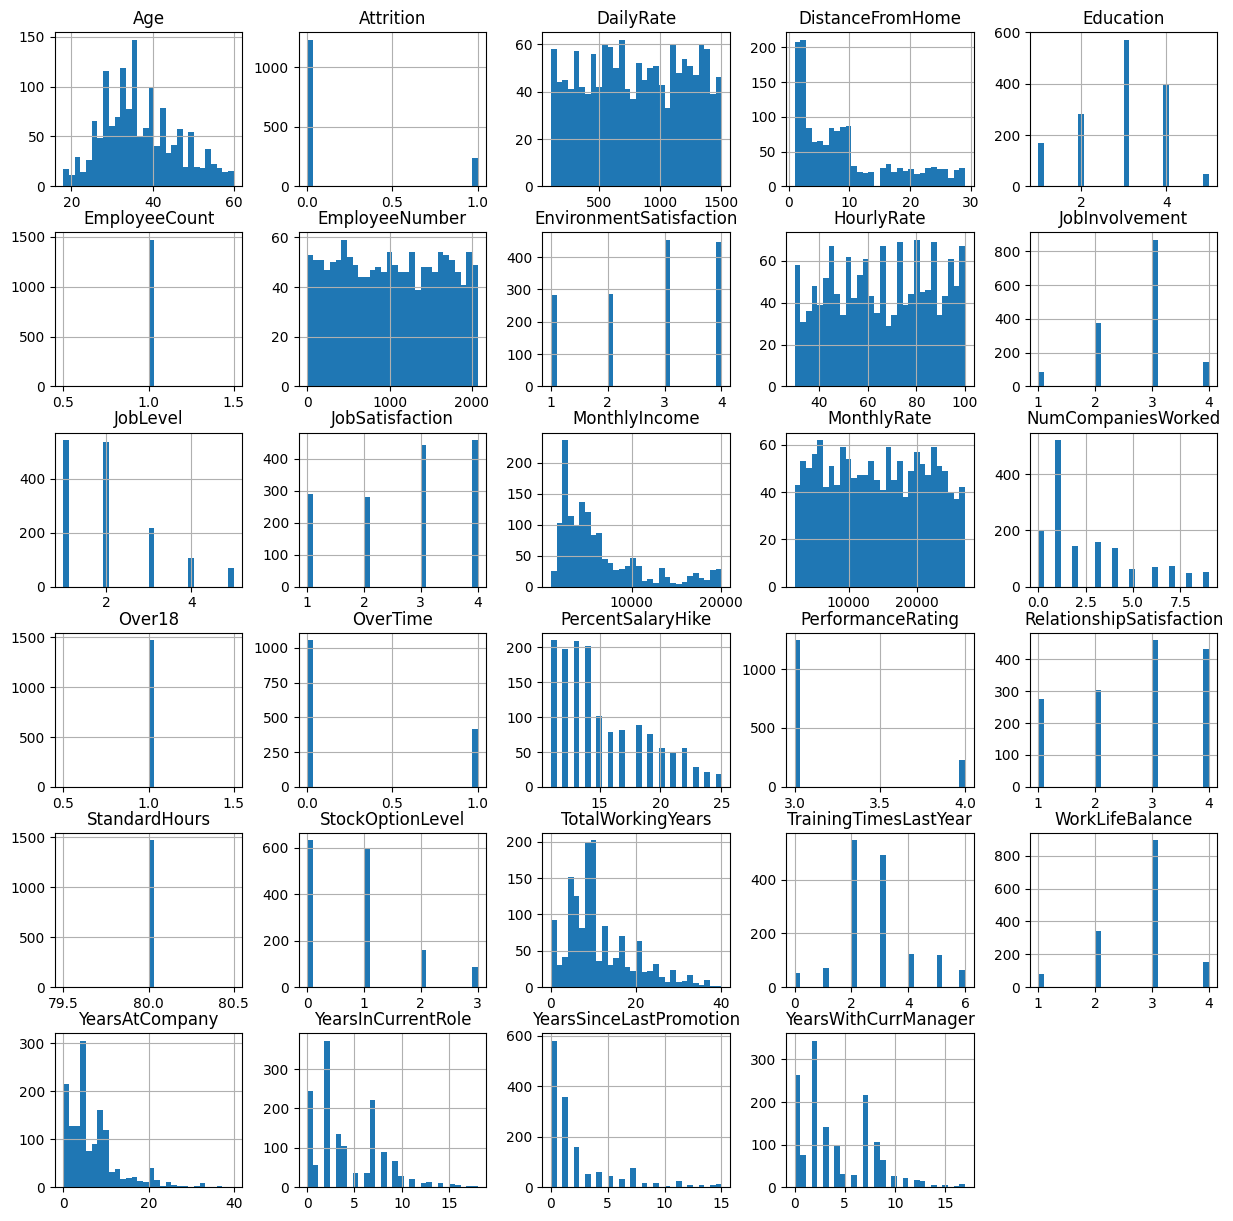

In [10]:
employee_data.hist(bins=30, figsize=(15,15))
plt.show()
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to deop 'EmployeeCount' and 'Standardhours', 'Over18', and 'employee number' since they do contribute to employee attrition

In [11]:
employee_data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [12]:
employee_data_corr = employee_data.drop(['BusinessTravel', 'Department', 'JobRole', 'Gender', 'EducationField', 'MaritalStatus'], axis=1)

In [13]:
employee_data_corr['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [14]:
employee_left = employee_data[employee_data['Attrition'] == 1]
employee_stayed = employee_data[employee_data['Attrition'] == 0]

In [15]:
employee_stayed

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [16]:
employee_left

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


In [17]:
employee_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [18]:
employee_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Observations:
1. Let's compare the mean and std of the employees who stayed and left.
2. 'age': mean age of the employees who stayed is higher when compared to who left.
3. 'DailyRate': Rate of employees who stayed is higher
4. 'DistanceFromHome': Employees who stayed live closer to home.
5. 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are gerally more satisfied with the job.
6. 'StockOptionLevel': Employyes who stayed tend to have higher stock option level.

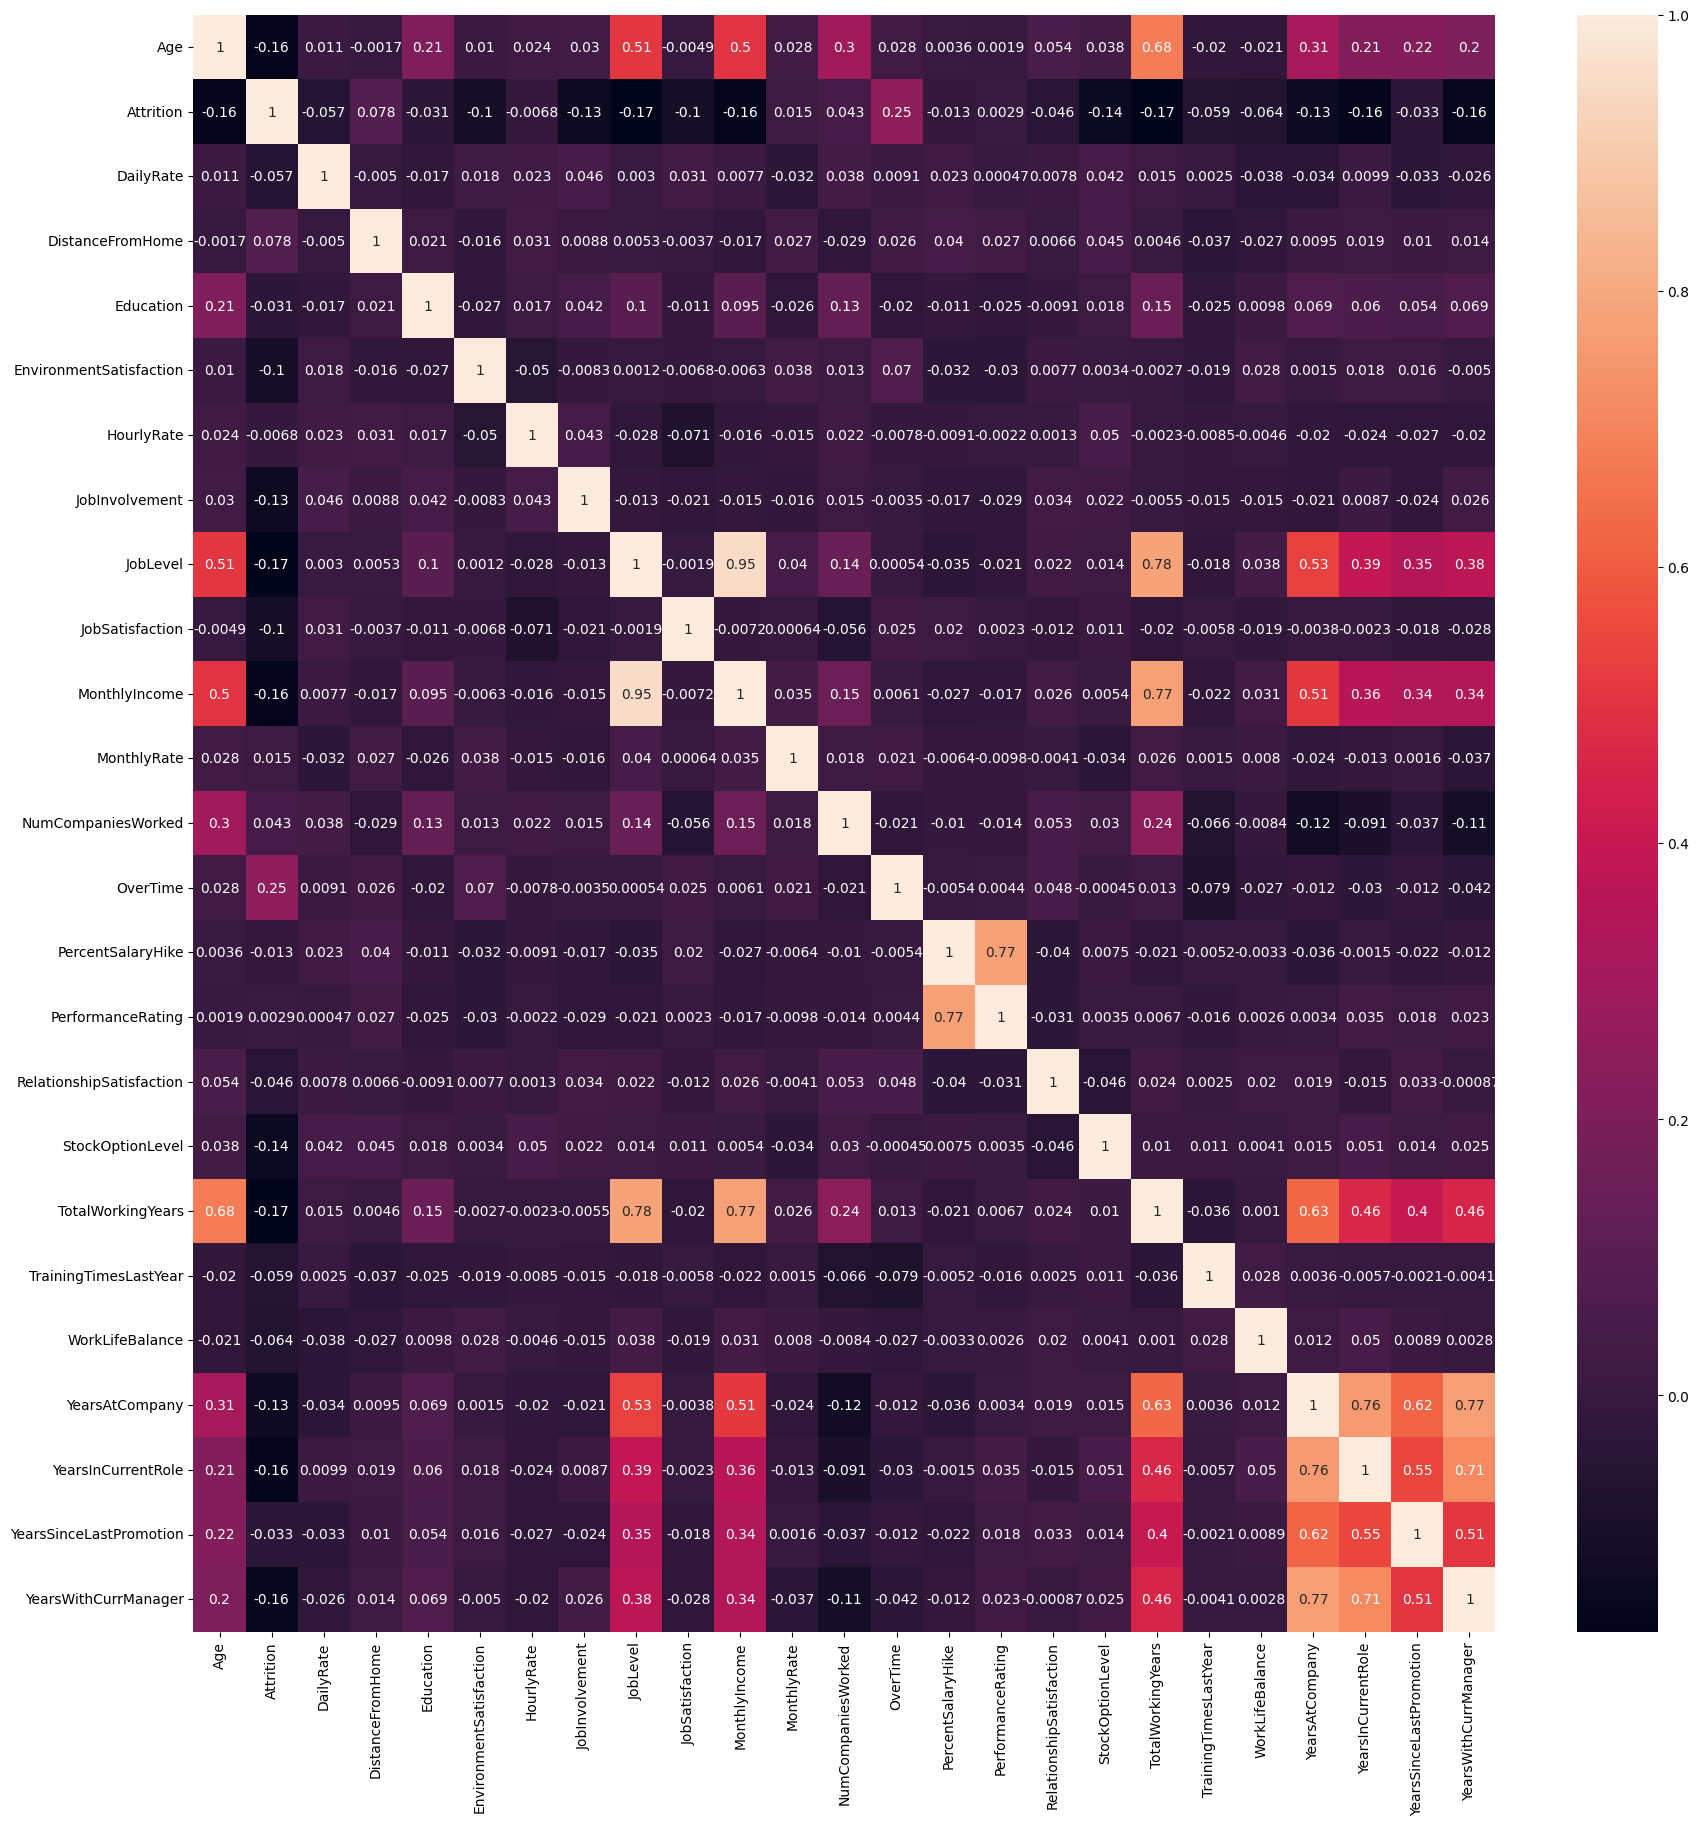

In [19]:
correlations = employee_data_corr.corr()
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(correlations, annot=True)
plt.show()

## 3.3. Task 4: Visualization Part 2

<Axes: xlabel='JobLevel', ylabel='count'>

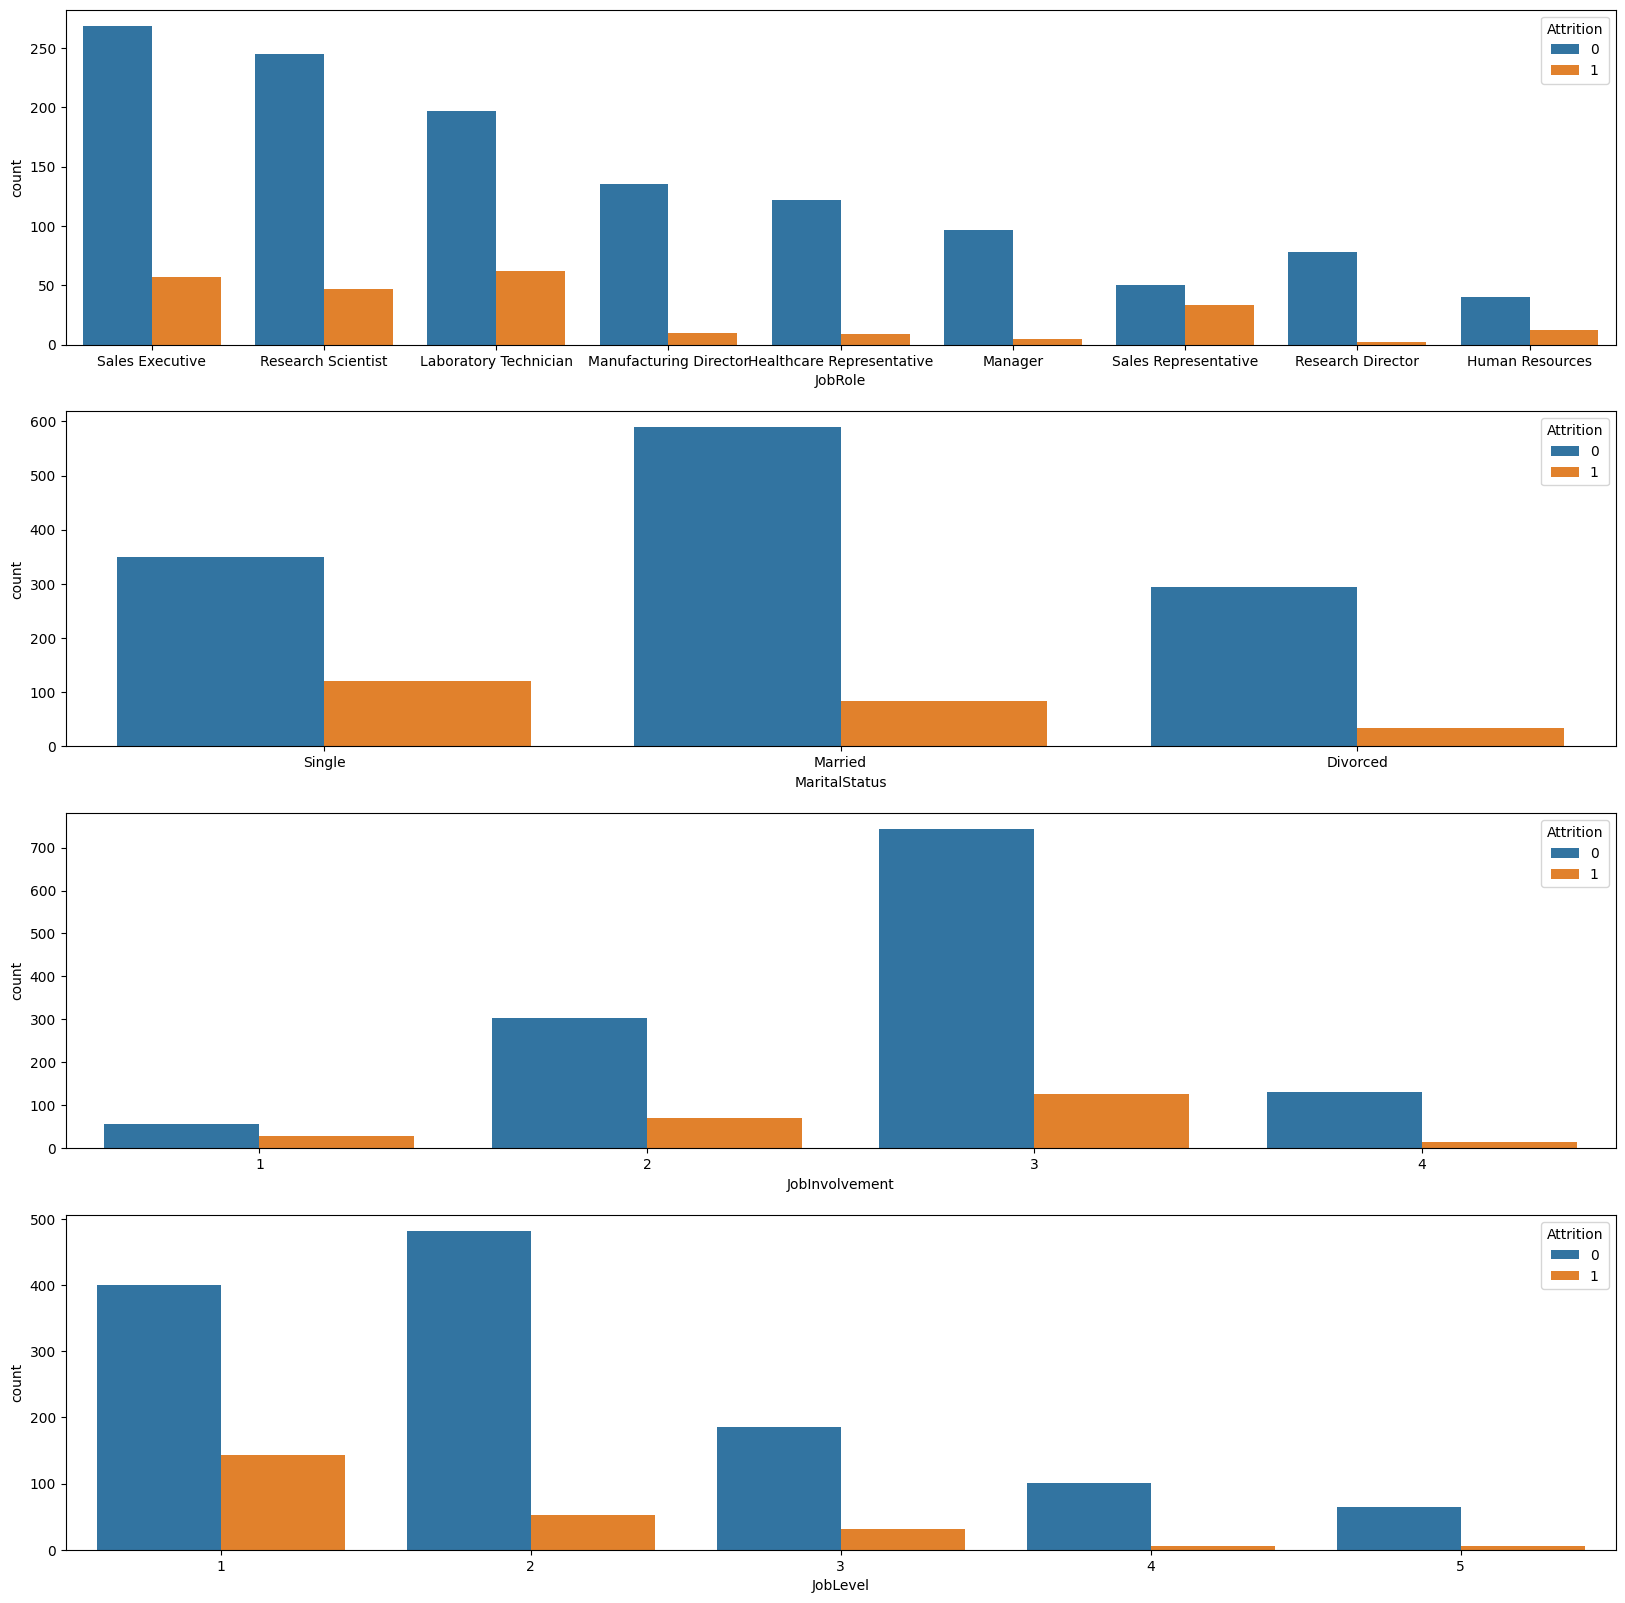

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', data=employee_data, hue='Attrition')
plt.subplot(412)
sns.countplot(x='MaritalStatus', data=employee_data, hue='Attrition')
plt.subplot(413)
sns.countplot(x='JobInvolvement', data=employee_data, hue='Attrition')
plt.subplot(414)
sns.countplot(x='JobLevel', data=employee_data, hue='Attrition')

Observations:
1. Single employees tend to leave compared to married and divorced.
2. Sales Representitives tend to leave compared to any other job.
3. Less involved employees tend to leave the company.
4. Less experienced (low job level) tend to leave the company.

Monthly Income Vs Job Role

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

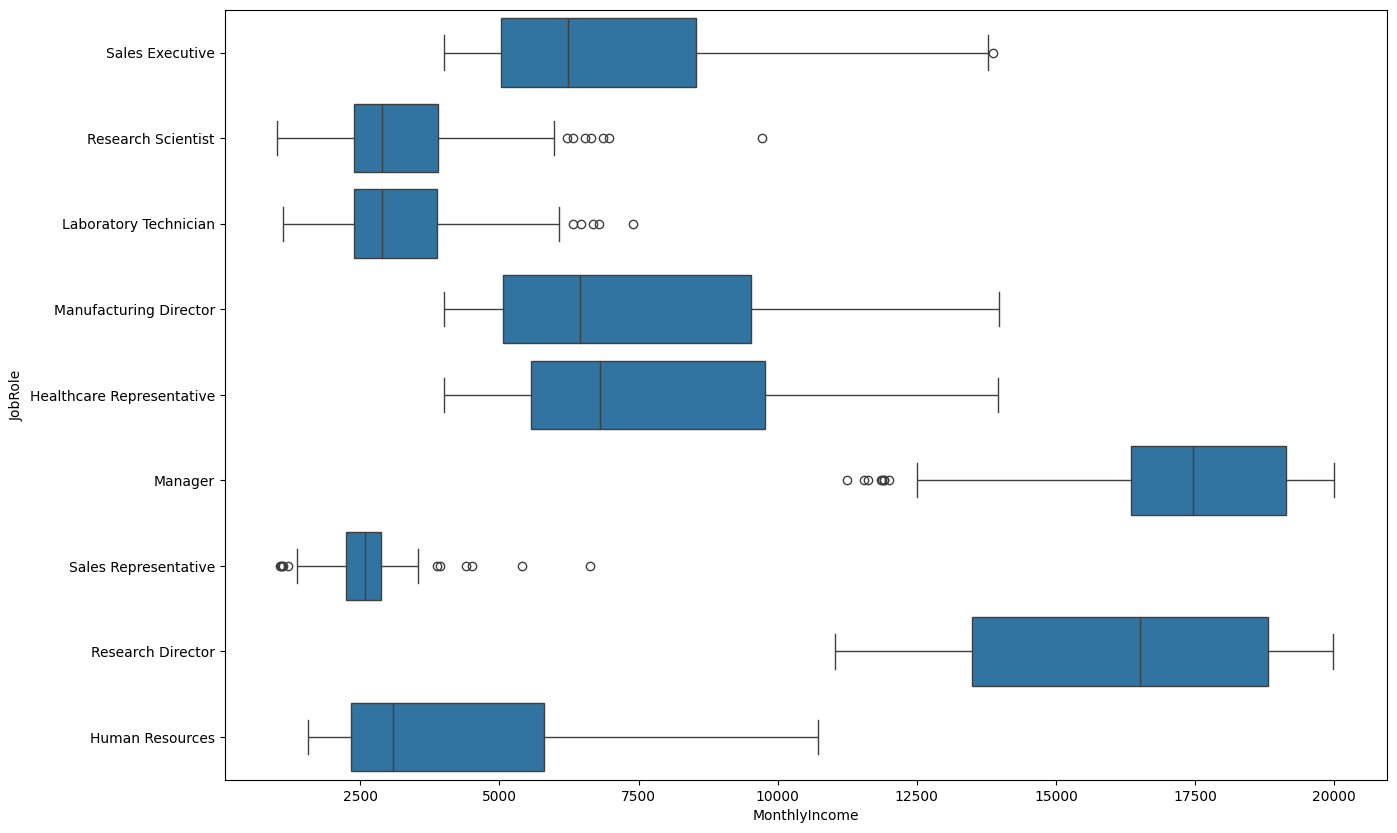

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(y='JobRole', x='MonthlyIncome', data=employee_data)

1. KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable.
2. KDE describes the probability density at different values in a continuous variable.

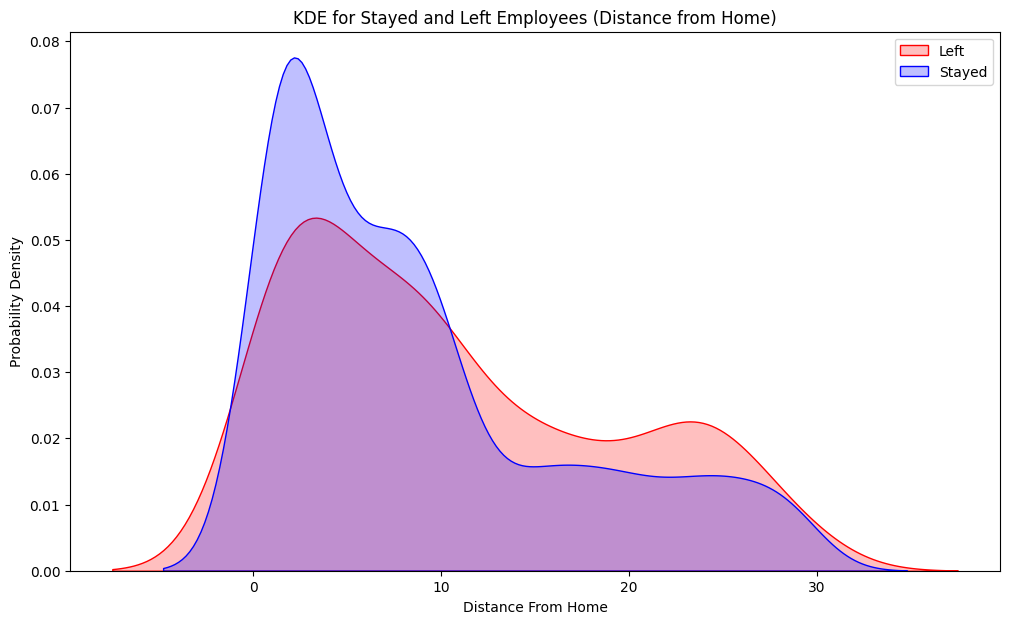

In [22]:
plt.figure(figsize=(12,7))
sns.kdeplot(employee_left.DistanceFromHome, color='red', label='Left', fill=True)
sns.kdeplot(employee_stayed.DistanceFromHome, color='blue', label='Stayed', fill=True)
plt.xlabel('Distance From Home')
plt.ylabel('Probability Density')
plt.title('KDE for Stayed and Left Employees (Distance from Home)')
plt.legend()
plt.show()
#

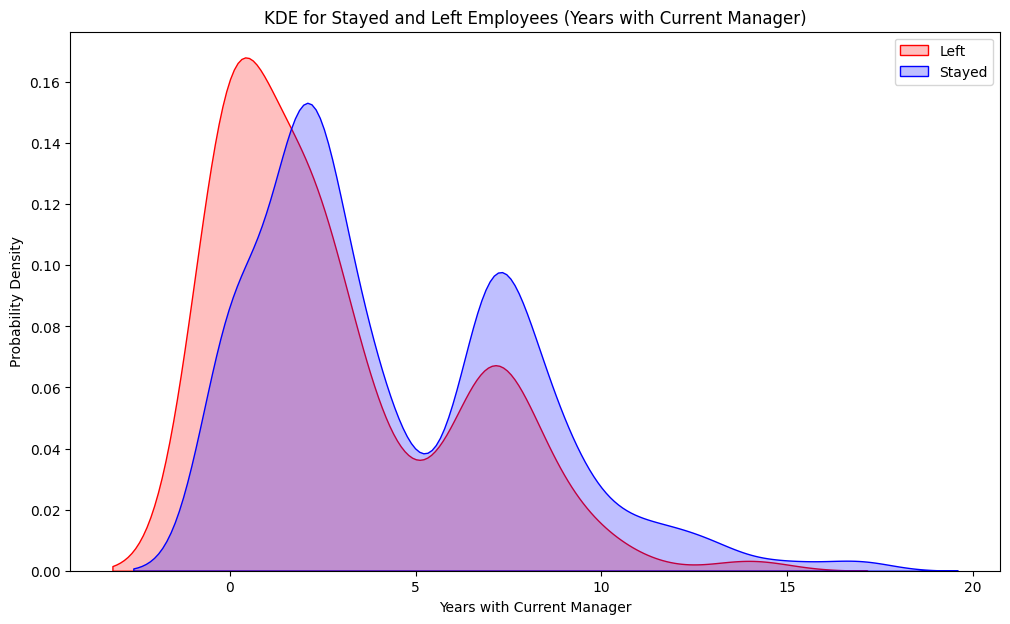

In [23]:
plt.figure(figsize=(12,7))
sns.kdeplot(employee_left.YearsWithCurrManager, color='red', label='Left', fill=True)
sns.kdeplot(employee_stayed.YearsWithCurrManager, color='blue', label='Stayed', fill=True)
plt.xlabel('Years with Current Manager')
plt.ylabel('Probability Density')
plt.title('KDE for Stayed and Left Employees (Years with Current Manager)')
plt.legend()
plt.show()

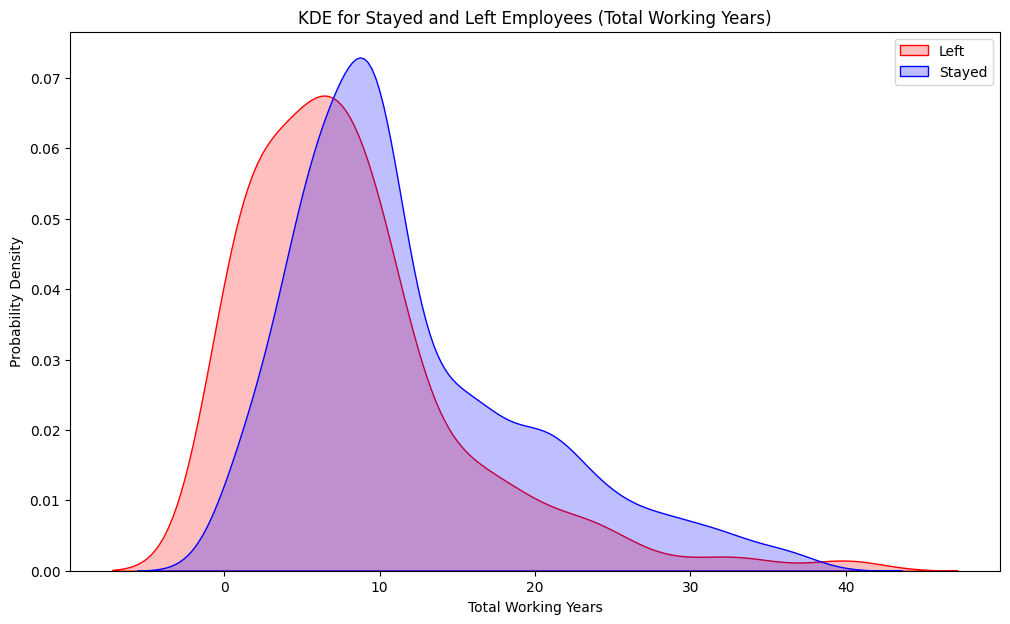

In [24]:
plt.figure(figsize=(12,7))
sns.kdeplot(employee_left.TotalWorkingYears, color='red', label='Left', fill=True)
sns.kdeplot(employee_stayed.TotalWorkingYears, color='blue', label='Stayed', fill=True)
plt.xlabel('Total Working Years')
plt.ylabel('Probability Density')
plt.title('KDE for Stayed and Left Employees (Total Working Years)')
plt.legend()
plt.show()

# Task 5: Create Training & Test Dataset, Perform Data Cleaning

In [25]:
X_cat = employee_data[['BusinessTravel', 'Department', 'JobRole', 'Gender', 'EducationField', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,JobRole,Gender,EducationField,MaritalStatus
0,Travel_Rarely,Sales,Sales Executive,Female,Life Sciences,Single
1,Travel_Frequently,Research & Development,Research Scientist,Male,Life Sciences,Married
2,Travel_Rarely,Research & Development,Laboratory Technician,Male,Other,Single
3,Travel_Frequently,Research & Development,Research Scientist,Female,Life Sciences,Married
4,Travel_Rarely,Research & Development,Laboratory Technician,Male,Medical,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Laboratory Technician,Male,Medical,Married
1466,Travel_Rarely,Research & Development,Healthcare Representative,Male,Medical,Married
1467,Travel_Rarely,Research & Development,Manufacturing Director,Male,Life Sciences,Married
1468,Travel_Frequently,Sales,Sales Executive,Male,Medical,Married


In [26]:
OneHotEncoder = OneHotEncoder()
X_cat_encoded = OneHotEncoder.fit_transform(X_cat).toarray()

In [27]:
X_cat_encoded.shape

(1470, 26)

In [28]:
X_cat_encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [29]:
X_cat_encoded = pd.DataFrame(X_cat_encoded)
X_cat_encoded

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X_cat_encoded.columns = X_cat_encoded.columns.astype(str)

In [30]:
X_numerical = employee_data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [42]:
X_combined = pd.concat([X_cat_encoded, X_numerical], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,4,0,17,3,2,9,6,0,8


In [43]:
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)
X_combined_scaled

array([[-0.33709993, -0.48185865,  0.63984058, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [-0.33709993,  2.07529738, -1.5628893 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [-0.33709993, -0.48185865,  0.63984058, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-0.33709993, -0.48185865,  0.63984058, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [-0.33709993,  2.07529738, -1.5628893 , ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.33709993, -0.48185865,  0.63984058, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [44]:
y = employee_data['Attrition']
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [45]:
print(X_combined.shape)
print(y.shape)

(1470, 49)
(1470,)


# Task 6: Logistic Regression Classifiers

Train and Evaluate a Logistic Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=1)

In [47]:
X_train.shape

(1176, 49)

In [48]:
X_test.shape

(294, 49)

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
print(f'Accuracy Score(%): {100 * accuracy_score(y_test, y_pred)}')
# print("Accuracy {0:.4f}".format(100 * accuracy_score(y_test, y_pred)))

Accuracy Score(%): 79.93197278911565


[[234  57]
 [  2   1]]


<Axes: >

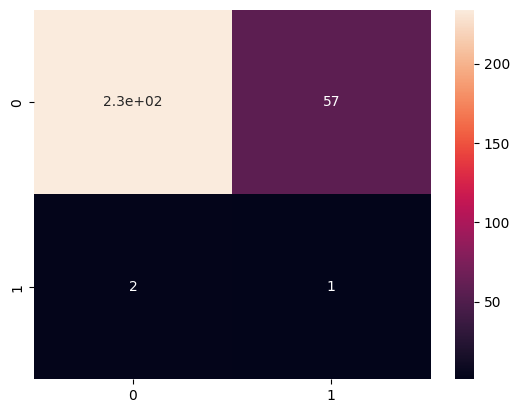

In [59]:
# Testing set performance
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
#

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       236
           1       0.33      0.02      0.03        58

    accuracy                           0.80       294
   macro avg       0.57      0.50      0.46       294
weighted avg       0.71      0.80      0.72       294



# XGboost Classifier Model

In [62]:
XG_model = XGBClassifier()
XG_model.fit(X_train, y_train)
y_pred_XG = XG_model.predict(X_test)
#

[[226  49]
 [ 10   9]]


<Axes: >

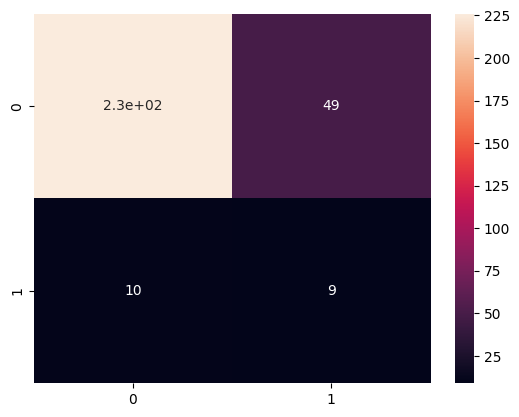

In [63]:
cm_XG_model = confusion_matrix(y_pred_XG, y_test)
print(cm_XG_model)
sns.heatmap(cm_XG_model, annot=True)
#

In [64]:
print(classification_report(y_test, y_pred_XG))
#

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       236
           1       0.47      0.16      0.23        58

    accuracy                           0.80       294
   macro avg       0.65      0.56      0.56       294
weighted avg       0.75      0.80      0.76       294

